## Загрузка библиотек

In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [11]:
def read_covid_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    X = pd.read_csv(path_to_csv)
    y = None
    return X, y


def read_hr_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    data = pd.read_csv(path_to_csv)
    return data.drop("target", axis=1), data.target

In [16]:
COVID_DATA_PATH = "./hw1_data/covid.csv"
HR_DATA_PATH = "./hw1_data/hr.csv"

In [17]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1.  (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

Взглянем на признаки

In [22]:
X_hr.head().T

,0,1,2,3,4
enrollee_id,8949,29725,11561,33241,666
city,city_103,city_40,city_21,city_115,city_162
city_development_index,0.92,0.776,0.624,0.789,0.767
gender,Male,Male,NaN,NaN,Male
relevent_experience,Has relevent experience,No relevent experience,No relevent experience,No relevent experience,Has relevent experience
enrolled_university,no_enrollment,no_enrollment,Full time course,NaN,no_enrollment
education_level,Graduate,Graduate,Graduate,Graduate,Masters
major_discipline,STEM,STEM,STEM,Business Degree,STEM
experience,>20,15,5,<1,>20
company_size,NaN,50-99,NaN,NaN,50-99


In [25]:
X_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
enrollee_id               19158 non-null int64
city                      19158 non-null object
city_development_index    19158 non-null float64
gender                    14650 non-null object
relevent_experience       19158 non-null object
enrolled_university       18772 non-null object
education_level           18698 non-null object
major_discipline          16345 non-null object
experience                19093 non-null object
company_size              13220 non-null object
company_type              13018 non-null object
last_new_job              18735 non-null object
training_hours            19158 non-null int64
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


Признак __enrollee_id__ - это просто идентификатор, не имеющий предсказательной силы, распределен равномерно на множестве значений

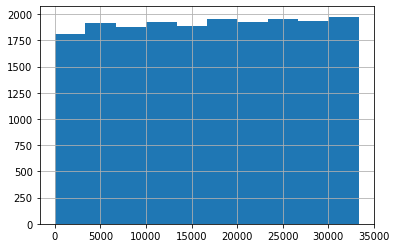

In [24]:
X_hr.enrollee_id.hist();

К собственно числовым признакам можно отнести только __city_development_index__ и __training_hours__

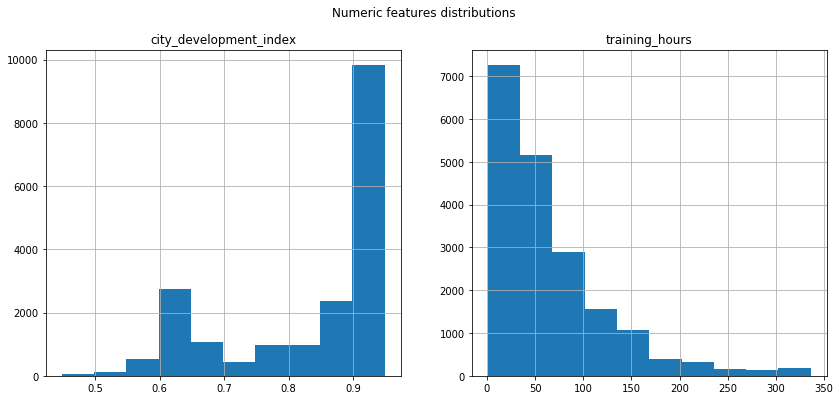

In [49]:
num_features = ["city_development_index", "training_hours"]
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Numeric features distributions")
ax[0].set_title("city_development_index")
X_hr.city_development_index.hist(ax=ax[0])
ax[1].set_title("training_hours")
X_hr.training_hours.hist(ax=ax[1]);

Все остальные признаки являются категориальными. Выведем статистику по ним

In [63]:
cat_features = X_hr.drop(num_features + ["enrollee_id"], axis=1).columns
for cat_feature in cat_features:
    print(f"Statistics for feature\t'{cat_feature}'\n\n{X_hr[cat_feature].value_counts(dropna=False)}\n\n")

Statistics for feature	'city'

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_121       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64


Statistics for feature	'gender'

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64


Statistics for feature	'relevent_experience'

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


Statistics for feature	'enrolled_university'

no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64


Statistics for feature	'education_level'

Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64


Statistics for feature	'major_discipline'

STE

#### 2.  (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [69]:
print(f'Исходный размер датасета hr:\t{len(X_hr)}')

Исходный размер датасета hr:	19158


In [66]:
X_hr_dropna = X_hr.dropna()

In [70]:
print(f'Pазмер датасета covid без NaN:\t{len(X_hr_dropna)}')

Pазмер датасета covid без NaN:	8955


_Ваш ответ_ : 10203

Давайте попробуем избежать сокращения размера датасета.

#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

Как видно из статистики датасета, по признакам __city_development_index__ и __training_hours__ нет пропущенных значений

In [85]:
X_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
enrollee_id               19158 non-null int64
city                      19158 non-null object
city_development_index    19158 non-null float64
gender                    14650 non-null object
relevent_experience       19158 non-null object
enrolled_university       18772 non-null object
education_level           18698 non-null object
major_discipline          16345 non-null object
experience                19093 non-null object
company_size              13220 non-null object
company_type              13018 non-null object
last_new_job              18735 non-null object
training_hours            19158 non-null int64
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


In [77]:
len(X_hr.city_development_index.dropna())/len(X_hr)

1.0

In [82]:
len(X_hr.training_hours.dropna())/len(X_hr)

1.0

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

_Ваш ответ_

In [ ]:
def fill_na(X, y):
    # Возвращает данные без NaN значений
    return X_fill, y_fill

In [ ]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)

#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

In [ ]:
# YOUR_CODE

_Ваш ответ_

### Задание 3 (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

In [ ]:
# YOUR_CODE

_Ваш ответ_

### Задание 4  (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


In [46]:
# YOUR_CODE

_Ваш ответ_

### Задание 5  (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)


In [ ]:
def encode(X):
    # Возвращает данные без категориальных признаков
    return X_encode

In [ ]:
X_hr_encode = encode(X_hr_fill)

_Ваш ответ_

### Задание 6 (3.5 балла)

Выполните задание для датасета _hr_.




#### 1. (1 балл)
Реализуйте функцию undersampling

#### 2. (1 балл)
Реализуйте функцию oversampling

In [ ]:
def undersampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    return X_under, y_under

def oversampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    return X_over, y_over

In [ ]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

#### 3. (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = # YOUR_CODE
X_hr_SMOTE, y_hr_SMOTE = # YOUR_CODE

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

In [92]:
# YOUR CODE

_Ваш ответ_